In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.calibration import CalibrationDisplay
import tensorflow as tf
import tensorflow_probability as tfp
import warnings
warnings.filterwarnings("ignore")
print('The scikit-learn version is {}.'.format(sklearn.__version__))

2021-11-17 13:32:42.246051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64
2021-11-17 13:32:42.246108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


The scikit-learn version is 1.0.1.


In [2]:
df = pd.read_csv("../src/data/vehicle_loan/vehicle_loan_data.csv")

In [3]:
df

,loanDefault,age,disbursedAmount,assetCost,itv,mobilenoAvlFlag,aadharFlag,panFlag,voteridFlag,drivingFlag,...,primaryInstalAmt,secInstalAmt,newAcctsInLastSixMonths,delinquentAcctsInLastSixMonths,averageAcctAge,creditHistoryLength,noOfInquiries,salaried,selfEmployed,unknownEmploy
0,0,34,50578,58400,89.55,1,1,0,0,0,...,0,0,0,0,0.00,0.00,0,1,0,0
1,1,33,47145,65550,73.23,1,1,0,0,0,...,1991,0,0,1,1.11,1.11,0,0,1,0
2,0,33,53278,61360,89.63,1,1,0,0,0,...,0,0,0,0,0.00,0.00,0,0,1,0
3,1,25,57513,66113,88.48,1,1,0,0,0,...,31,0,0,0,0.80,1.30,1,0,1,0
4,1,41,52378,60300,88.39,1,1,0,0,0,...,0,0,0,0,0.00,0.00,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,0,30,63213,105405,60.72,1,0,0,1,0,...,4084,0,0,0,1.90,3.30,0,1,0,0
233150,0,30,73651,100600,74.95,1,0,0,1,0,...,1565,0,0,0,0.60,0.60,0,0,1,0
233151,0,42,33484,71212,48.45,1,1,0,0,0,...,0,0,0,0,0.00,0.00,0,1,0,0
233152,0,24,34259,73286,49.10,1,1,0,0,0,...,0,0,0,0,0.00,0.00,0,1,0,0


In [4]:
1 - df.loanDefault.mean()

0.7829288796246258

In [5]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit(df).transform(df)

In [7]:
X = df[:, 1:]
y = df[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
y_train = np.int8(y_train)
y_test = np.int8(y_test)

ML Model

In [9]:
clf = LogisticRegression(random_state=0, 
                         n_jobs = 16,
                         max_iter = 1000,
                         penalty = 'l2',
                         C = 1e6
                        ).fit(X_train, y_train)

In [10]:
clf.score(X_train, y_train)

0.781694482717949

In [11]:
clf.score(X_test, y_test)

0.7860865089747164

In [12]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train, y_train)
# neigh.score(X_train, y_train)

In [13]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=5, random_state=0)
# clf.fit(X_train, y_train)
# clf.score(X_train, y_train)

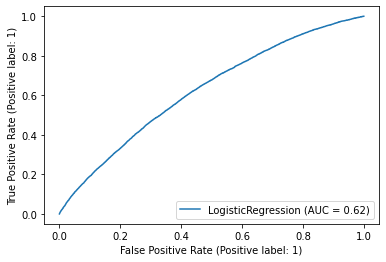

In [14]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

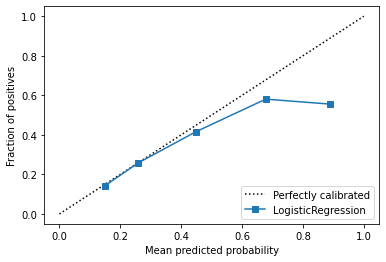

In [15]:
disp = CalibrationDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [18]:
#Code from https://www.tensorflow.org/probability/api_docs/python/tfp/stats/expected_calibration_error and model.py
#in /src
num_bins = 10

y_pred = clf.predict(X)
y_train_tensor = tf.convert_to_tensor(y, dtype=tf.int64, name='labels_true')
y_pred_tensor = tf.convert_to_tensor(y_pred, dtype=tf.int64)
y_pred_proba = clf.predict_proba(X)
logit_tensor = tf.convert_to_tensor(y_pred_proba, dtype=tf.float32, name='logits')

tfp.stats.expected_calibration_error(
    num_bins, logits=logit_tensor, labels_true=y_train_tensor, labels_predicted=None, name="logistic_regression"
)

<tf.Tensor: shape=(), dtype=float32, numpy=0.14548808>